<b><font size = 45>LEMBAR KERJA KELOMPOK 3 - ANALISIS DATA</font></b>

Kelompok: Kung Fu Pandas

Nama anggota:

1. Fajar Buana Hidayat
2. Adnan Al-farizi Rahmat
3. Muhammad Ichsan Kamil
4. Muhammad Ihsas Alvi Ibrahim
5. Syarafina Dewi

# Tujuan Analisis Data

``Tuliskan tujuan analisis data yang dilakukan. Sebagai contoh: Tujuan dari analisis data x ini adalah untuk memprediksi variabel a berdasarkan umur, daerah tinggal, dan .....``

Tujuan dari analisis data deteksi spam email ini adalah untuk mengembangkan model klasifikasi yang dapat mengidentifikasi apakah suatu email adalah spam atau bukan berdasarkan fitur-fitur seperti panjang pesan, jumlah kata kunci spam, frekuensi kata-kata tertentu.

## Perihal Data

``Tampilkan overview data yang digunakan dan penjelasan datanya``

In [2]:
import pandas as pd

df= pd.read_csv("spam.csv", encoding = "ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Dataset ini berisi beberapa email secara acak yang dikumpulkan dan diklasifikasikan sebagai spam atau ham. 
Kolom pertama berisi spam / ham klasifikasi kolom resr memiliki email itu sendiri

Label: Kolom ini berisi label atau kategori yang mengidentifikasi apakah suatu email termasuk dalam kelas spam atau non-spam (ham)

Isi Email: Kolom ini berisi teks atau konten dari email itu sendiri. Teks ini merupakan fitur yang digunakan untuk melakukan klasifikasi, yaitu menentukan apakah email tersebut termasuk ke dalam kelas spam atau non-spam berdasarkan informasi yang terdapat di dalamnya.

# Telaah Statistik

``Tampilkan statistik deskriptif untuk mendukung pemahaman terhadap data dan distribusinya``

In [3]:
import numpy as np

print('Descriptive Statistics:\n', df.describe())

Descriptive Statistics:
           v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2  


# Data Preprocessing

``Lakukan data preprocessing seperlunya sesuai dengan kebutuhan pemodelan dan kondisi data. Preprocessing bisa berupa handling missing data, feature engineering, transformasi data, dan seleksi fitur.``

In [4]:
#Renaming the Columns

df.rename({'v1':'Label','v2':'Email'},axis=1,inplace=True)
df

,Label,Email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# Removing the Last Three Columns

df_new = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df_new.head()

,Label,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Check Missing value

df_new.isna().sum()

Label    0
Email    0
dtype: int64

In [7]:
#Check for Duplicated Values

df_new.duplicated().sum()

403

In [8]:
#Remove Duplicates

df_new = df_new.drop_duplicates(keep='first')
df_new.head()

,Label,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# check total row and column after remove duplicates

df_new.shape

(5169, 2)

In [10]:
# Changing Label to Numeric

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_new['Label'] = le.fit_transform(df_new['Label'])

df_new.head()

,Label,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


1. Lowercase
2. Tokenization
3. Removing Special Character
4. Removing stop words and punctuation
5. stemming

In [11]:
# data is imbalaced
## Now we are going to do Analysis on No. of Characters, Words, and Sentences Used in every Message

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


False

In [12]:
# let's do data preprocessing like remove punctucation, stopwords, stemming

from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def text_processing(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            stemming = ps.stem(i)
            y.append(stemming)
            
    return " ".join(y)

In [13]:
# Create a new column to store the clean data

df_new['transformed_text'] = df_new['Email'].apply(text_processing)
df_new.head()

,Label,Email,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [14]:
# First of all We have to Convert Our SMS text to Vectors Using Bag of Words Technique

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Mengubah teks menjadi vektor Bow
X = vectorizer.fit_transform(df_new['transformed_text'])

# View a list of words recognized by the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Shows a BoW vector representation
print("Representasi vektor BoW:")
print(X.toarray())

# Displays a list of recognized words
print("Daftar kata:")
print(feature_names)


Representasi vektor BoW:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Daftar kata:
['008704050406' '0089' '0121' ... 'åôrent' 'ìä' 'ìï']


In [15]:
#Make new variable y

y = np.array(df_new['Label'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def visualize(label):
    words = ''
    for txt in df_new[df_new['Label'] == label]['Email']:
        words = words + txt + ' '
        
    wordcloud = WordCloud(width=500,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

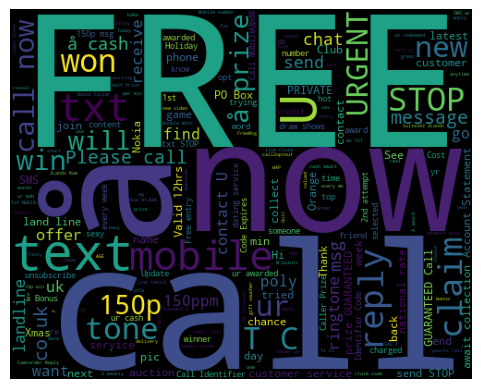

In [18]:
visualize(1)

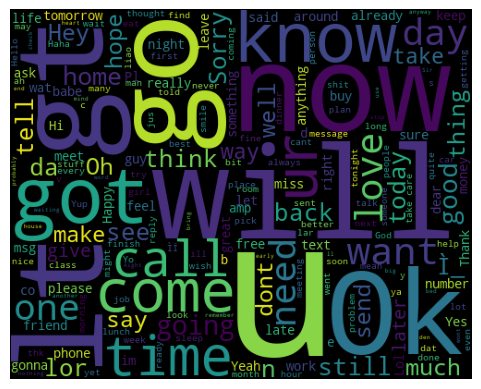

In [20]:
visualize(0)

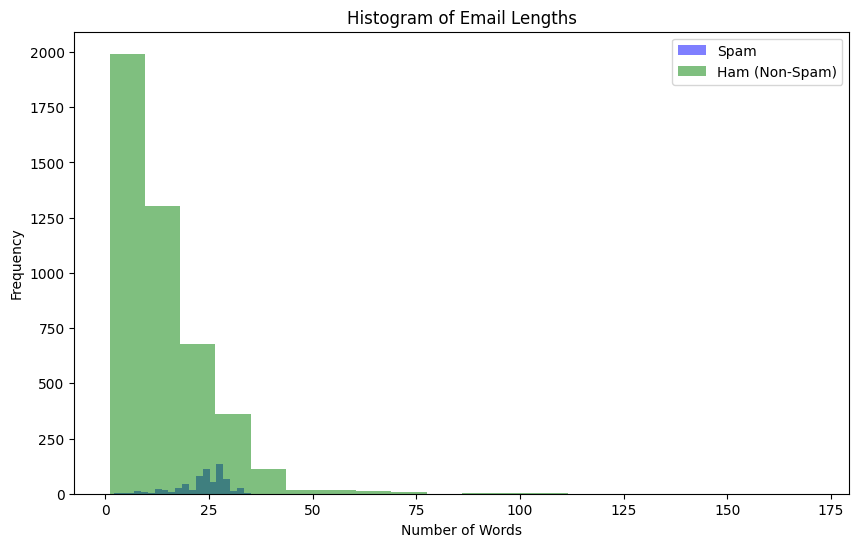

In [21]:
import matplotlib.pyplot as plt

# Simulated data, replace with your actual data
spam_lengths = [len(email.split()) for email in df_new[df_new['Label'] == 1]['Email']]
ham_lengths = [len(email.split()) for email in df_new[df_new['Label'] == 0]['Email']]

plt.figure(figsize=(10, 6))
plt.hist(spam_lengths, bins=20, alpha=0.5, color='blue', label='Spam')
plt.hist(ham_lengths, bins=20, alpha=0.5, color='green', label='Ham (Non-Spam)')
plt.title('Histogram of Email Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()


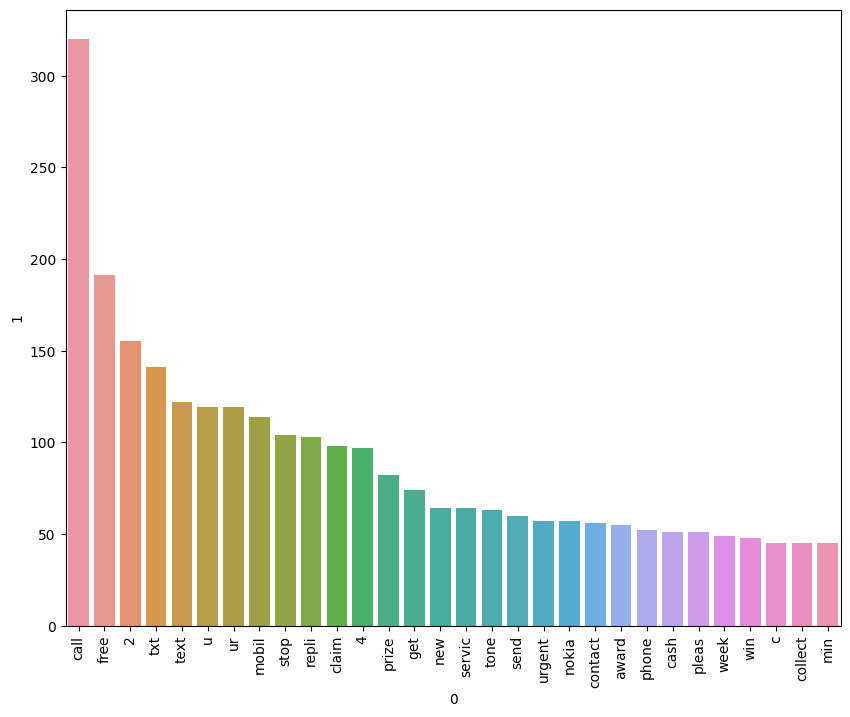

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

## Converting Spam Messages to List of Words
x = df_new[df_new['Label'] == 1]['transformed_text'].str.cat(sep= " ")
spam_msg_word_list = x.split()
len(spam_msg_word_list)

from collections import Counter
spam_top_30words = pd.DataFrame(Counter(spam_msg_word_list).most_common(30))

## Visualising it on the Bar Plot
plt.figure(figsize=(10,8))
sns.barplot(x=spam_top_30words[0],y=spam_top_30words[1], data=spam_top_30words)
plt.xticks(rotation='vertical')
plt.show()

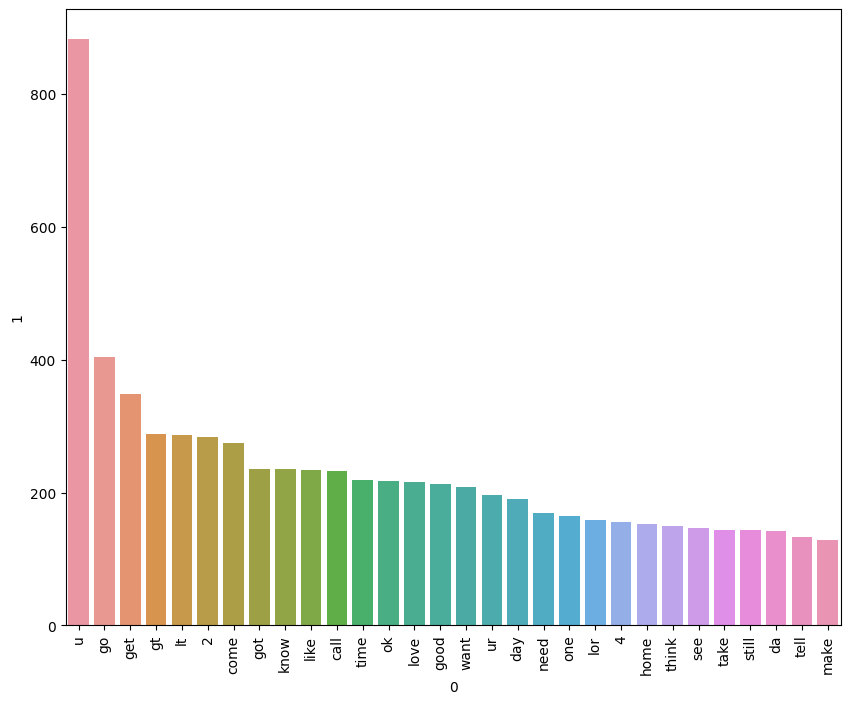

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

## Converting ham Messages to List of Words
x = df_new[df_new['Label'] == 0]['transformed_text'].str.cat(sep= " ")
ham_msg_word_list = x.split()
len(ham_msg_word_list)

from collections import Counter
ham_top_30words = pd.DataFrame(Counter(ham_msg_word_list).most_common(30))

## Visualising it on the Bar Plot
plt.figure(figsize=(10,8))
sns.barplot(x=ham_top_30words[0],y=ham_top_30words[1], data=ham_top_30words)
plt.xticks(rotation='vertical')
plt.show()

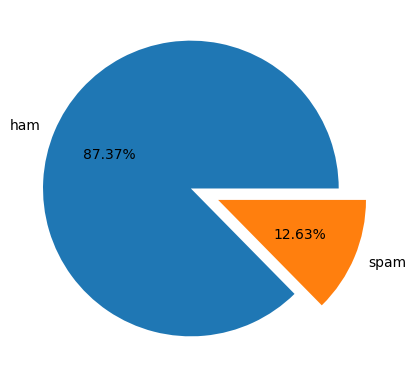

In [25]:
plt.pie(df_new['Label'].value_counts(), labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0.1])
plt.show()

# Pemodelan dan Evaluasi

## Pemodelan

``Lakukan task analisis data menggunakan teknik yang sesuai dengan tujuan awal. Analisis data bisa berupa prediksi, clustering, ataupun association rule``

In [ ]:
# Split data into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=0.30)

In [ ]:
from sklearn.svm import SVC

classifier = SVC(C=5, kernel='rbf')
classifier.fit(X_train, y_train)

SVC(C=5)

In [ ]:
# uji dengan sembarang data
test_aja = ['WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461', 'Hey Good Morning, how are you?']
test_aja = vectorizer.transform(test_aja)

In [ ]:
prediksi = classifier.predict(test_aja)
print(prediksi)

[1 0]


## Evaluasi

``Lakukan evaluasi model yang dihasilkan menggunakan pengukuran yang sesuai dengan metode atau algoritma pemodelan dan mendukung tujuan awal``

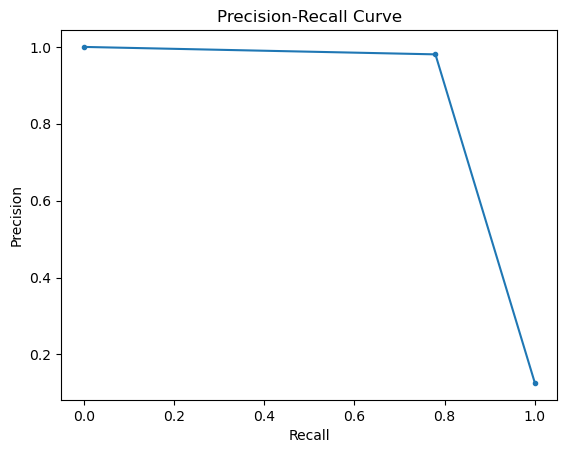

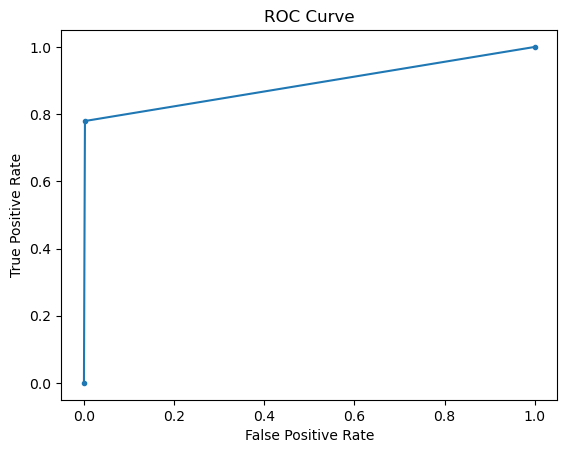

[[1353    3]
 [  43  152]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Prediksi menggunakan model yang telah dilatih
y_pred = classifier.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Menghitung kurva precision-recall
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Menghitung kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


In [ ]:
# Menampilkan hasil metrik evaluasi dalam angka

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9703
Precision: 0.9806
Recall: 0.7795
F1-Score: 0.8686
ROC AUC: 0.8886
Confusion Matrix:
[[1353    3]
 [  43  152]]
